<a href="https://colab.research.google.com/github/jason96819/Studying/blob/main/nlp/5_%EC%9D%98%EB%AF%B8_%EC%97%B0%EA%B2%B0%EB%A7%9D_%EB%B6%84%EC%84%9D(Semantic_Network_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 의미 연결망 분석(Semantic Network Analysis)

* 사회 연결망 분석(Social Network Analysis)는 분석 대상 및 분석 대상들간의 관계를   
연결망 구조로 표현하고 이를 계량적으로 제시하는 분석 기법
* 사회 연결망 분석은 사람, 장소, 물품 등의 객체 간의 관계를 분석하는데 효과적이며  
주로 친구 관계, 전력 공급 등을 분석하는데 사용
* 사회 연결망 분석 기법을 텍스트 내 단어의 관계에 적용한 것이 바로 의미 연결망 분석
* 의미 연결망 분석에서는 일정한 범위 내에서 어휘가 동시에 등장하면 서로 연결된 것으로 간주, 이 연결 관계들을 분석


## n-gram

* `nltk` 라이브러리는 편하게 n-gram을 생성할 수 있는 함수를 제공
* 많이 사용되는 `bigrams`의 경우에는 별도의 함수를 제공하니 해당 내용을 참조하여 n-gram 생성
* 앞뒤의 관계를 파악하기위해 n-gram사용

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk import word_tokenize, bigrams

sentence = 'I love data science and deep learning.'
tokens = word_tokenize(sentence)

bgram = bigrams(tokens)
bgram_list = [x for x in bgram]

print(bgram_list)


[('I', 'love'), ('love', 'data'), ('data', 'science'), ('science', 'and'), ('and', 'deep'), ('deep', 'learning'), ('learning', '.')]


In [ ]:
from nltk.util import ngrams

tgram = ngrams(tokens, 3)
qgram = ngrams(tokens, 4)

tgram_list = [x for x in tgram]
qgram_list = [x for x in qgram]

print(tgram_list)
print(qgram_list)

[('I', 'love', 'data'), ('love', 'data', 'science'), ('data', 'science', 'and'), ('science', 'and', 'deep'), ('and', 'deep', 'learning'), ('deep', 'learning', '.')]
[('I', 'love', 'data', 'science'), ('love', 'data', 'science', 'and'), ('data', 'science', 'and', 'deep'), ('science', 'and', 'deep', 'learning'), ('and', 'deep', 'learning', '.')]


## 어휘 동시 출현 빈도의 계수화

* 동시 출현(Co-occurrence)란 두 개 이상의 어휘가 일정한 범위나 거리 내에서 함께 출현하는 것을 의미
* 단어간의 동시 출현 관계를 분석하면 문서나 문장으로부터 두 단어가 유사한 의미를 가졌는지 등의 추상화된 정보를 얻을 수 있음
* 동시 출현 빈도는 Window라는 지정 범위 내에서 동시 등장한 어휘를 확률 등으로 계수화 가능
* 예를 들어, 단어 뒤 잘못된 단어가 온다면, 이를 동시 출현 빈도가 높은 단어로 교정 가능

* 어휘 동시 출현 빈도 행렬은 하나하나 측정할 수도 있지만, 바이그램 개수를 정리하면 편리하게 만들어 볼 수 있음
* `nltk`에서 제공하는 `ConditionalFreqDist` 함수를 이용하면 문맥별 단어 빈도를 쉽게 측정 가능

In [ ]:
from nltk import ConditionalFreqDist

sentences = ['I love data science and deep learning', 'I love science', 'I know this code']
tokens = [word_tokenize(x) for x in sentences]
bgrams = [bigrams(x) for x in tokens]

token = []
for i in bgrams:
  token += ([x for x in i])
cfd = ConditionalFreqDist(token)
cfd.conditions()

['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this']

In [ ]:
print(cfd['I'])

<FreqDist with 2 samples and 3 outcomes>


In [ ]:
print(cfd['I']['love'])                                         #동시출현 횟수

2


In [ ]:
print(cfd['I'].most_common(1))

[('love', 2)]


In [ ]:
import numpy as np

freq_matrix = []

for i in cfd.keys():
  temp = []
  for j in cfd.keys():
    temp.append(cfd[i][j])
  freq_matrix.append(temp)
freq_matrix = np.array(freq_matrix)

print(cfd.keys())
print(freq_matrix)

dict_keys(['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this'])
[[0 2 0 0 0 0 1 0]
 [0 0 1 1 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0]]


* 해당 동시 출현 빈도 행렬을 좀 더 보기 쉽도록 데이터프레임으로 시각화

In [ ]:
import pandas as pd

df = pd.DataFrame(freq_matrix, index=cfd.keys(), columns=cfd.keys())
df.style.background_gradient(cmap='coolwarm')

,I,love,data,science,and,deep,know,this
I,0,2,0,0,0,0,1,0
love,0,0,1,1,0,0,0,0
data,0,0,0,1,0,0,0,0
science,0,0,0,0,1,0,0,0
and,0,0,0,0,0,1,0,0
deep,0,0,0,0,0,0,0,0
know,0,0,0,0,0,0,0,1
this,0,0,0,0,0,0,0,0


* 동시 출현 빈도 행렬은 인접 행렬로도 간주할 수 있음
* `networkx` 라이브러리를 사용해 해당 행렬을 그래프로 시각화

* 앞서 만든 데이터프레임을 그래프로 변환
* 넘파이 배열 등으로도 가능하나, 이 경우 별도로 라벨을 지정해줘야만 함

In [ ]:
import networkx as nx

G = nx.from_pandas_adjacency(df)                                                                                                                                          # 판다스 인접행렬을 바로 읽을 수 있는 기능

print(G.nodes())
print(G.edges())

['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this']
[('I', 'love'), ('I', 'know'), ('love', 'data'), ('love', 'science'), ('data', 'science'), ('science', 'and'), ('and', 'deep'), ('know', 'this')]


* 각 엣지에 접근해보면 각 엣지의 가중치에 각 단어간의 빈도가 사용된 것을 확인 가능

In [ ]:
print(G.edges()[('I', 'love')])                                        # 가중치가 2? 두번 등장
print(G.edges()[('I', 'know')])

{'weight': 2}
{'weight': 1}


* `nx.draw`를 통해 간편하게 그래프를 시각화할 수 있음

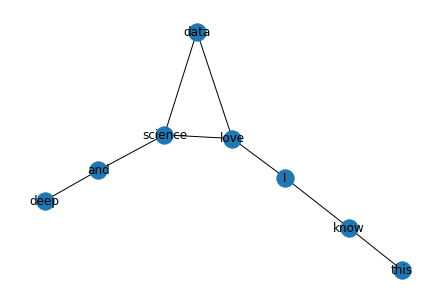

In [ ]:
nx.draw(G, with_labels=True)

* 어휘 동시 출현 빈도를 이용하면 어휘 동시 출현 확률까지 측정 가능
* 어휘 동시 출현 확률 계산에는 `nltk`의 `ConditionalProbDist`를 이용

In [ ]:
from nltk.probability import ConditionalProbDist, MLEProbDist

cpd = ConditionalProbDist(cfd, MLEProbDist)
cpd.conditions()

['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this']

In [ ]:
prob_matrix = []

for i in cpd.keys():
  prob_matrix.append([cpd[i].prob(j) for j in cpd.keys()])

prob_matrix = np.array(prob_matrix)

print(cpd.keys())
print(prob_matrix)

dict_keys(['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this'])
[[0.         0.66666667 0.         0.         0.         0.
  0.33333333 0.        ]
 [0.         0.         0.5        0.5        0.         0.
  0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]


In [ ]:
df = pd.DataFrame(prob_matrix, index=cpd.keys(), columns=cpd.keys())
df.style.background_gradient(cmap='coolwarm')

,I,love,data,science,and,deep,know,this
I,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000
love,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000
data,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
science,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
and,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
deep,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
know,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
this,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


* 확률 행렬도 인접 행렬로 간주할 수 있음
* 그래프 시각화시 빈도 행렬과 동일한 결과를 얻을 수 있으나, 확률을 가중치로 사용시 부정확한 결과를 얻을 수 있음

In [ ]:
prob_G = nx.from_pandas_adjacency(df)

print(prob_G.nodes())
print(prob_G.edges())

['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this']
[('I', 'love'), ('I', 'know'), ('love', 'data'), ('love', 'science'), ('data', 'science'), ('science', 'and'), ('and', 'deep'), ('know', 'this')]


In [ ]:
print(G.edges()[('I', 'love')])
print(G.edges()[('I', 'know')])

print(prob_G.edges()[('I', 'love')])
print(prob_G.edges()[('I', 'know')])

{'weight': 2}
{'weight': 1}
{'weight': 0.6666666666666666}
{'weight': 0.3333333333333333}


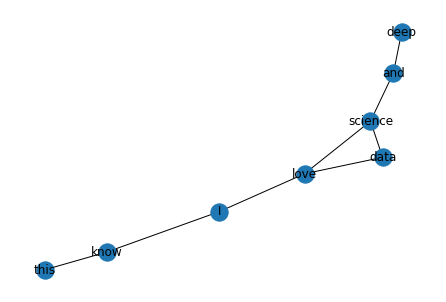

In [ ]:
nx.draw(prob_G, with_labels=True)

## 중심성(Centrality) 지수

* 연결망 분석에서 가장 많이 주목하는 속성은 바로 중심성 지수
* 중심성은 전체 연결망에서 중심에 위치하는 정도를 표현하는 지표로, 이를 분석하면 연결 정도, 중요도 등을 알 수 있음
* 중심성 지수는 나타내는 특징에 따라 연결 중심성, 매개 중심성, 근접 중심성, 위세 중심성으로 구분

### 연결 중심성(Degree Centrality)

* 연결 중심성은 가장 기본적이고 직관적으로 중심섬을 측정하는 지표
* 텍스트에서 다른 단어와의 동시 출현 빈도가 많은 특정 단어는 연결 중심성이 높다고 볼 수 있음
* 연결 정도로만 측정하면 연결망의 크기에 따라 달라져 비교가 어렵기 때문에 여러 방법으로 표준화
* 주로 (특정 노드 i와 직접적으로 연결된 노드 수 / 노드 i와 직간접적으로 연결된 노드 수)로 계산

* 여기서 직접적으로 연결된 노드는 서로 엣지 관계인 노드를 뜻하며, 간접적으로 연결된 노드는 서로 엣지 관계는 아니나 다른 노드와 엣지에 의해 도달할 수 있는 노드를 말함

* 연결 중심성 계산 수식

$$ degree_{ik} = \sum_{i=1}^{N} Z_{ijk} = Z_{jk}$$
$$ outdegree_{ik} = \sum_{j=1}^{N} Z_{ijk} = Z_{ik} $$
$$ C_{i} = \sum_{j=1}^{n}(Z_{ij}+Z_{ji}) / \sum_{i=1}^{n}\sum_{j=1}^{n}(Z_{ij})\qquad단, 0\le C \le 1$$

* 해당 수식을 직접 계산할 수도 있으나,     
`networkx`에는 해당 라이브러리로 구성된 그래프의 연결 중심성을 쉽게 계산해주는 함수가 존재   

In [ ]:
nx.degree_centrality(G)

{'I': 0.2857142857142857,
 'and': 0.2857142857142857,
 'data': 0.2857142857142857,
 'deep': 0.14285714285714285,
 'know': 0.2857142857142857,
 'love': 0.42857142857142855,
 'science': 0.42857142857142855,
 'this': 0.14285714285714285}

### 위세 중심성(Eigenvector Centraility)

* 위세 중심성은 연결된 상대 단어의 중요성에 가중치를 둠
* 중요한 단어와 많이 연결됐다면 위세 중심성은 높아지게 됨
* 위세 중심성은 고유 벡터로써 인접해 있는 노드의 위세 점수와 관련되어 있어 직접 계산하기는 쉽지 않음

* 위세 중심성 계산 수식

$$ P_i =\sum_{j=1}^{N-1}P_iZ_{ji},\qquad0 \le P_i \le 1$$

* 위세 중심성 계산에는 `eigenvector_centraility`를 이용해 계산
* `weight`로는 어휘 동시 출현 빈도를 이용

In [ ]:
nx.eigenvector_centrality(G, weight='weight')

{'I': 0.5055042648573065,
 'and': 0.15933837227495717,
 'data': 0.35703593885196566,
 'deep': 0.055886131430398216,
 'know': 0.20216573350291445,
 'love': 0.6195557831651917,
 'science': 0.39841035839294925,
 'this': 0.07090581134630142}

### 근접 중심성(Closeness Centrality)


* 근접 중심성은 한 단어가 다른 단어에 얼마나 가깝게 있는지를 측정하는 지표
* 직접적으로 연결된 노드만 측정하는 연결 중심성과는 다르게, 근접 중심성은 직간접적으로 연결된 모든 노드들 사이의 거리를 측정
* 근접 중심성을 측정하기 위해선 다음과 같이 계산

  (모든 노드 수 - 1 / 특정 노드 i에서 모든 노드에 이르는 최단 경로 수를 모두 더한 수)


$$ C_C(A) = \frac{1}{\frac{1}{N-1}\sum_{x \ne A}l_{X,A}} = \frac{N-1}{\sum_{x \ne A}l_{X,A}} $$

* 근접 중심성을 계산하기 위해선 `closeness_centrality()` 함수를 사용

In [ ]:
nx.closeness_centrality(G, distance='weight')

{'I': 0.35,
 'and': 0.3333333333333333,
 'data': 0.3684210526315789,
 'deep': 0.25925925925925924,
 'know': 0.2916666666666667,
 'love': 0.4375,
 'science': 0.4117647058823529,
 'this': 0.23333333333333334}

### 매개 중심성(Betweeness Centrality)

* 매개 중심성은 한 단어가 단어들과의 연결망을 구축하는데 얼마나 도움을 주는지 측정하는 지표
* 매개 중심성이 높은 단어는 빈도 수가 작더라도 단어 간 의미부여 역할이 크기 때문에, 해당 단어를 제거하면 의사소통이 어려워짐
* 매개 중심성은 모든 노드 간 최단 경로에서 특정 노드가 등장하는 횟수로 측정하며,     
표준화를 위해 최댓값인 (N-1) x (N-2) / 2로 나눔

* 매개 중심성 계산 수식

$$ C_{B}^{'}(P_m) = \frac{\sum_i^N \sum_j^N \frac{g_{imj}}{g_{ij}}}{(\frac{N^2-3N+2}{2})}, \qquad 단, i<j,\quad i \ne j$$

* 매개 중심성을 계산하기 위해선 `current_flow_betweenness_centrality()` 함수를 이용

In [ ]:
nx.current_flow_betweenness_centrality(G)

{'I': 0.4761904761904764,
 'and': 0.28571428571428564,
 'data': 0.19047619047619005,
 'deep': 2.1147105230955362e-16,
 'know': 0.28571428571428614,
 'love': 0.6190476190476187,
 'science': 0.5396825396825393,
 'this': 8.458842092382145e-17}

### 페이지랭크(PageRank)

* 월드 와이드 웹과 같은 하이퍼링크 구조를 가지는 문서에 상대적 중요도에 따라 가중치를 부여하는 방법
* 이 알고리즘은 서로간에 인용과 참조로 연결된 임의의 묶음에 적용 가능
* 페이지 랭크는 더 중요한 페이지는 더 많은 다른 사이트로부터 링크를 받는다는 관찰에 기초

In [ ]:
nx.pagerank(G)

{'I': 0.1536831077679558,
 'and': 0.12417333539164832,
 'data': 0.10481873412175656,
 'deep': 0.07152392879557615,
 'know': 0.1224741813421488,
 'love': 0.19501225218917406,
 'science': 0.15751225722745082,
 'this': 0.07080220316428934}

In [ ]:
def get_node_size(node_values):
  nsize = np.array([v for v in node_values])
  nsize = 1000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

  return nsize

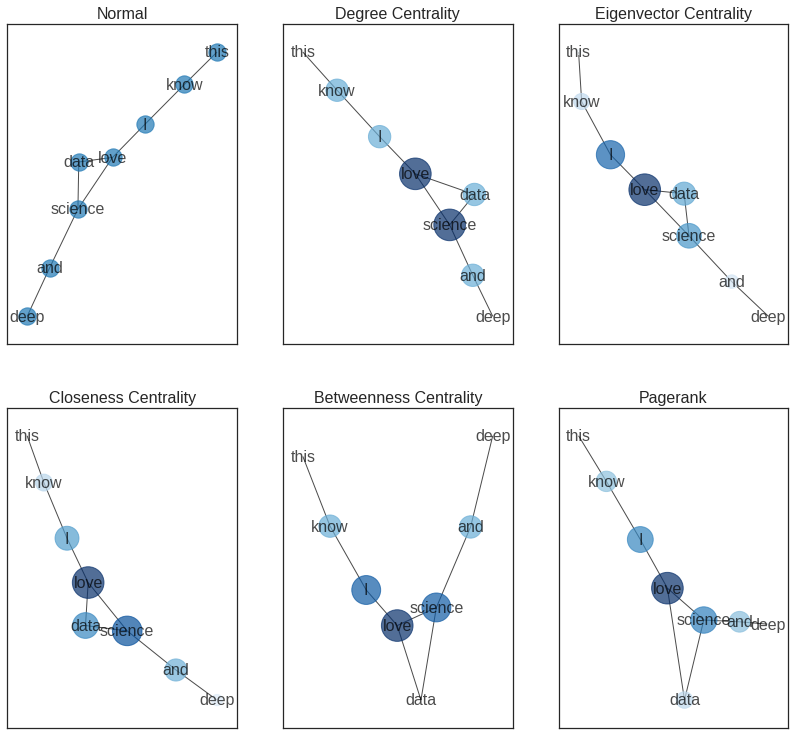

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

dc = nx.degree_centrality(G).values()
ec = nx.eigenvector_centrality(G, weight='weight').values()
cc = nx.closeness_centrality(G, distance='weight').values()
bc = nx.betweenness_centrality(G).values()
pr = nx.pagerank(G).values()

plt.figure(figsize=(14, 20))
plt.axis('off')

plt.subplot(331)
plt.title('Normal', fontsize=16)
nx.draw_networkx(G, font_size=16, alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(332)
plt.title('Degree Centrality', fontsize=16)
nx.draw_networkx(G, font_size=16,
                 node_color=list(dc), node_size=get_node_size(dc),
                 alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(333)
plt.title('Eigenvector Centrality', fontsize=16)
nx.draw_networkx(G, font_size=16,
                 node_color=list(ec), node_size=get_node_size(ec),
                 alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(334)
plt.title('Closeness Centrality', fontsize=16)
nx.draw_networkx(G, font_size=16,
                 node_color=list(cc), node_size=get_node_size(cc),
                 alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(335)
plt.title('Betweenness Centrality', fontsize=16)
nx.draw_networkx(G, font_size=16,
                 node_color=list(bc), node_size=get_node_size(bc),
                 alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(336)
plt.title('Pagerank', fontsize=16)
nx.draw_networkx(G, font_size=16,
                 node_color=list(pr), node_size=get_node_size(pr),
                 alpha=0.7, cmap=plt.cm.Blues)

plt.show()

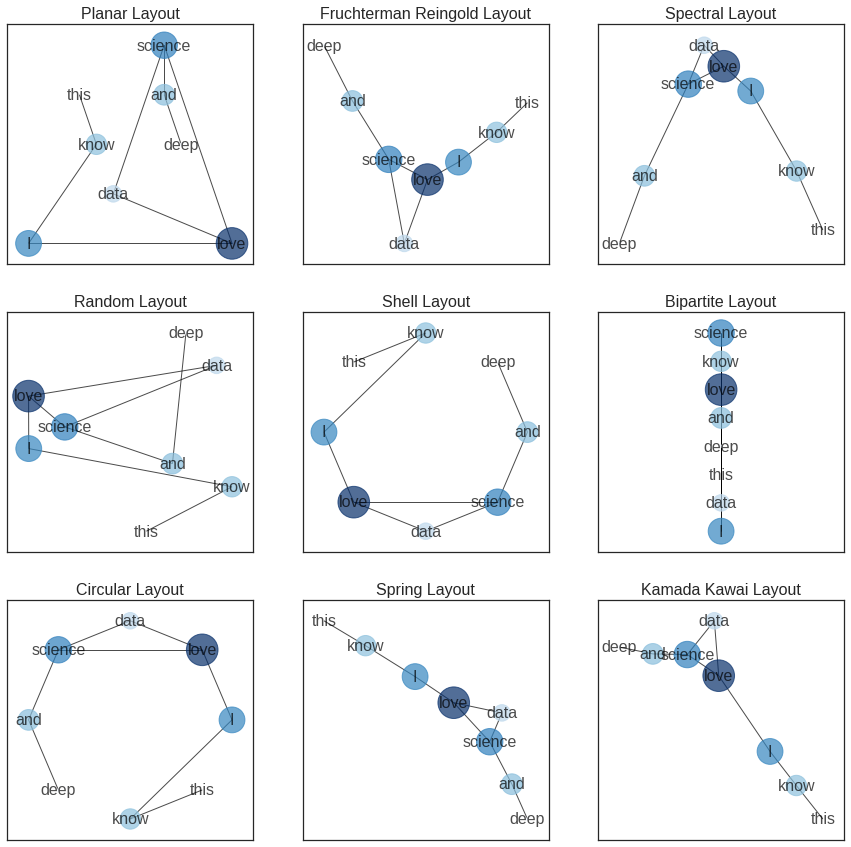

In [ ]:
pl = nx.planar_layout(G)
frl = nx.fruchterman_reingold_layout(G)
sl = nx.spectral_layout(G)
rl = nx.random_layout(G)
shl = nx.shell_layout(G)
bl = nx.bipartite_layout(G, G.nodes())
cl = nx.circular_layout(G)
spl = nx.spring_layout(G)
kkl = nx.kamada_kawai_layout(G)

option = {
    'font_size': 16,
    'node_color': list(pr),
    'node_size': get_node_size(pr),
    'alpha': 0.7,
    'cmap': plt.cm.Blues
}

plt.figure(figsize=(15, 15))
plt.axis('off')

plt.subplot(331)
plt.title('Planar Layout', fontsize=16)
nx.draw_networkx(G, pos=pl, **option)

plt.subplot(332)
plt.title('Fruchterman Reingold Layout', fontsize=16)
nx.draw_networkx(G, pos=frl, **option)

plt.subplot(333)
plt.title('Spectral Layout', fontsize=16)
nx.draw_networkx(G, pos=sl, **option)

plt.subplot(334)
plt.title('Random Layout', fontsize=16)
nx.draw_networkx(G, pos=rl, **option)

plt.subplot(335)
plt.title('Shell Layout', fontsize=16)
nx.draw_networkx(G, pos=shl, **option)

plt.subplot(336)
plt.title('Bipartite Layout', fontsize=16)
nx.draw_networkx(G, pos=bl, **option)

plt.subplot(337)
plt.title('Circular Layout', fontsize=16)
nx.draw_networkx(G, pos=cl, **option)

plt.subplot(338)
plt.title('Spring Layout', fontsize=16)
nx.draw_networkx(G, pos=spl, **option)

plt.subplot(339)
plt.title('Kamada Kawai Layout', fontsize=16)
nx.draw_networkx(G, pos=kkl, **option)

plt.show()